In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
dataset=pd.read_csv("/content/LoanApprovalPrediction.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data=dataset.drop(columns=['Loan_ID','Gender'])

In [ ]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            598 non-null    int64  
 1   Dependents         598 non-null    float64
 2   Education          598 non-null    int64  
 3   Self_Employed      598 non-null    int64  
 4   ApplicantIncome    598 non-null    int64  
 5   CoapplicantIncome  598 non-null    float64
 6   LoanAmount         598 non-null    float64
 7   Loan_Amount_Term   598 non-null    float64
 8   Credit_History     598 non-null    float64
 9   Property_Area      598 non-null    int64  
 10  Loan_Status        598 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 51.5 KB
None
(598, 11)


Yes    388
No     210
Name: Married, dtype: int64
Index(['Yes', 'No'], dtype='object') 

Graduate        465
Not Graduate    133
Name: Education, dtype: int64
Index(['Graduate', 'Not Graduate'], dtype='object') 

No     488
Yes    110
Name: Self_Employed, dtype: int64
Index(['No', 'Yes'], dtype='object') 

Semiurban    225
Urban        198
Rural        175
Name: Property_Area, dtype: int64
Index(['Semiurban', 'Urban', 'Rural'], dtype='object') 

Y    411
N    187
Name: Loan_Status, dtype: int64
Index(['Y', 'N'], dtype='object') 



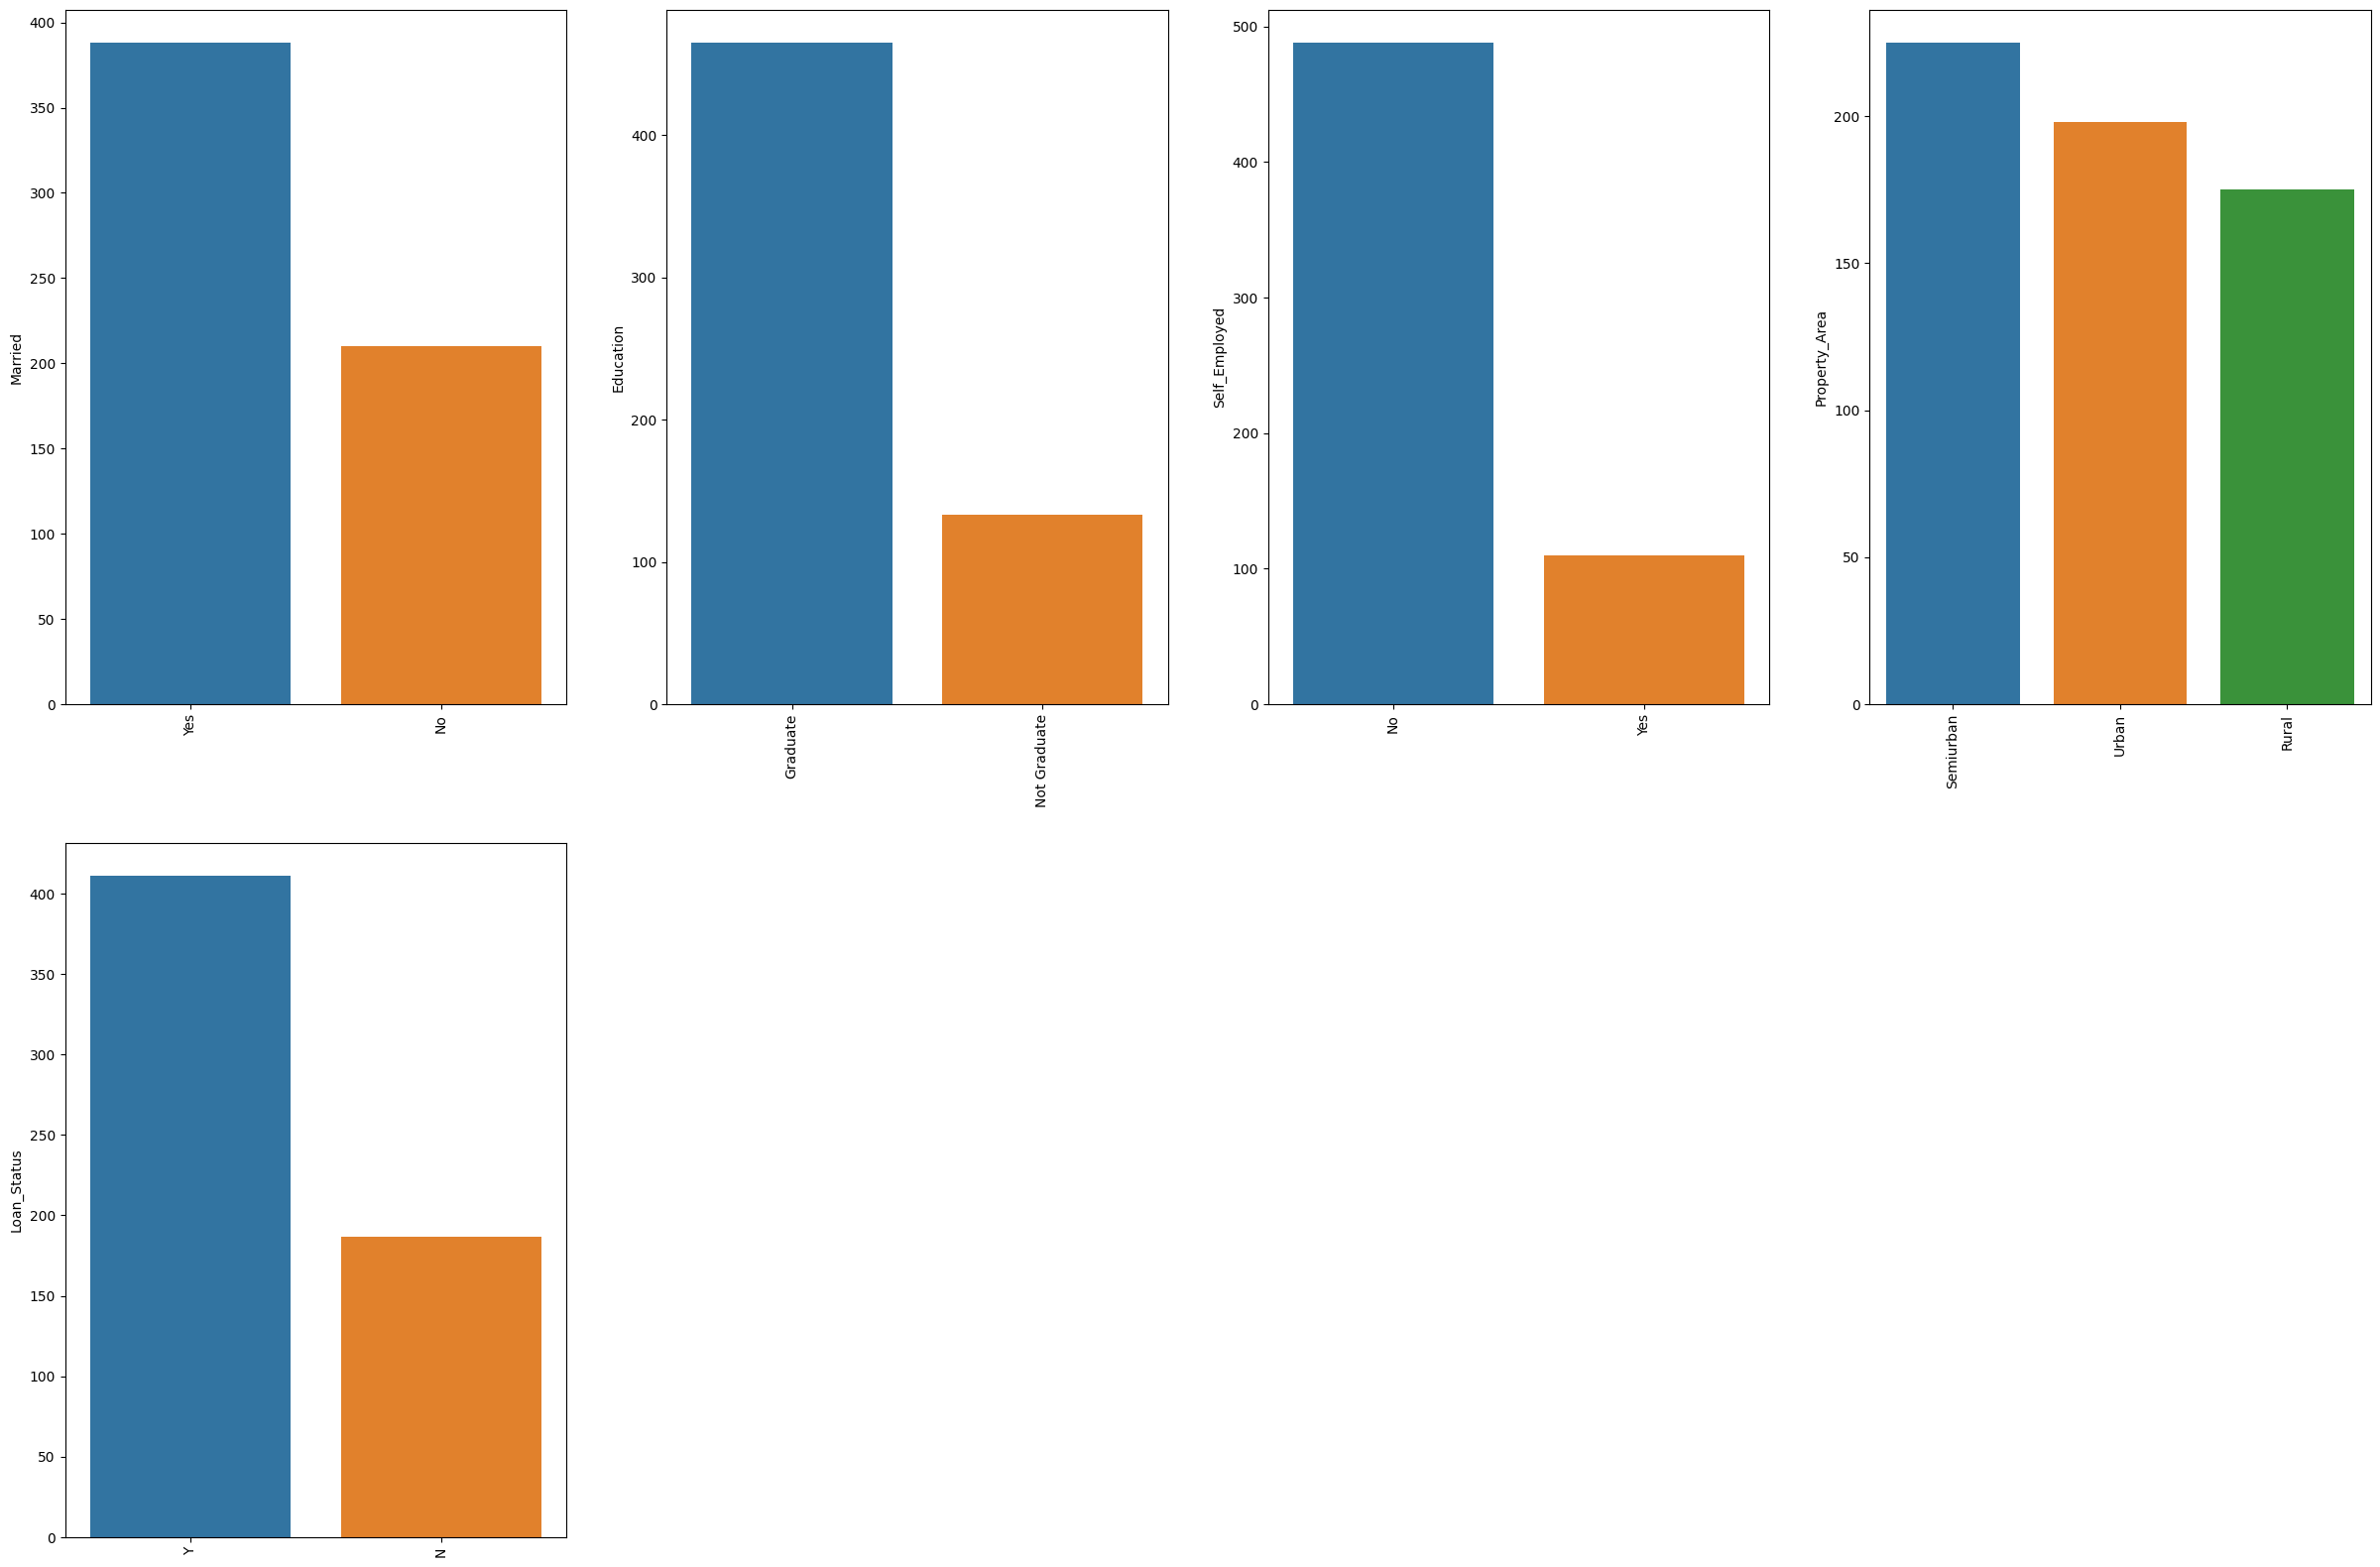

In [ ]:
obj = (data.dtypes == 'object')
obj = list(obj[obj].index)
plt.figure(figsize=(30,20))
index = 1

for col in obj:
  y = data[col].value_counts()
  print(y)
  print(y.index,'\n')
  plt.subplot(2,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1


In [ ]:
label_en=preprocessing.LabelEncoder()
for cols in obj:
  data[cols]=label_en.fit_transform(data[cols])
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())

In [ ]:
selected=['Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
X=data[selected]
Y=data['Loan_Status']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
Y_pred=model.predict(X_test)
print(f'Accuray : ',metrics.accuracy_score(y_test,Y_pred))

Accuray :  0.8111111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
